In [1]:
import matplotlib.pyplot as plt;
import skimage.data as data
import numpy as np

In [13]:
def normalize(img):
    img = np.log(1 + np.absolute(img))
    img = (img - img.min())/(img.max() - img.min())
    img = img*255
    img = img.astype(np.uint8)
    return img

In [14]:
def fft(img):
    fft = np.fft.fft2(img)
    #fft = np.absolute(fft * (255.0 / fft.max()))  # proper scaling into 0..255 range
    return fft

def inverse_fft(img):
    ifft = np.fft.ifft2(img)
    #ifft = np.absolute(ifft * (255.0 / ifft.max()))  # proper scaling into 0..255 range
    return ifft

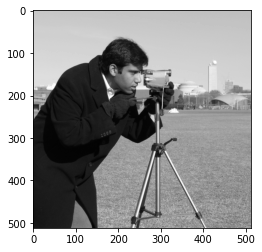

In [15]:
## Read in data file and transform
img_org = data.camera()
plt.imshow(img_org, cmap='gray')

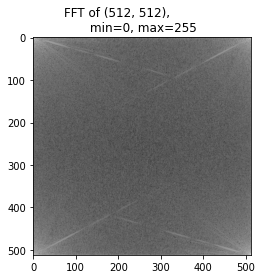

In [19]:
fft_img = fft(img_org)
fft_img_norm = normalize(fft_img)

plt.imshow(fft_img_norm, cmap='gray')
plt.title(f'FFT of {img_org.shape}, \
            \n min={fft_img_norm.min()}, max={fft_img_norm.max()}')

plt.show()

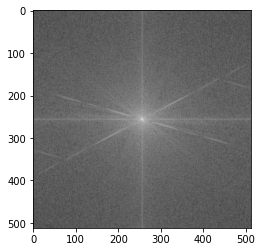

In [17]:
shifted_fft_img = np.fft.fftshift(fft_img)
shifted_fft_img_norm = normalize(shifted_fft_img)

plt.imshow(shifted_fft_img_norm, cmap='gray')

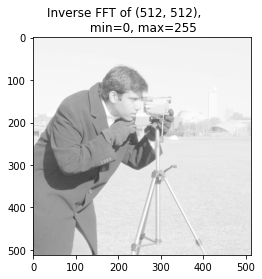

In [21]:
ifft_img = inverse_fft(fft_img)
ifft_img_norm = normalize(ifft_img)

plt.imshow(ifft_img_norm, cmap='gray')
plt.title(f'Inverse FFT of {shifted_fft_img.shape}, \
        \n min={ifft_img_norm.min()}, max={ifft_img_norm.max()}')
plt.show()